https://mintaewon.github.io/2020/12/kaggle-titanic-%EC%83%9D%EC%A1%B4%EC%9E%90-%EC%98%88%EC%B8%A1-1-eda/

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# “what sorts of people were more likely to survive?”
##### using passenger data (ie name, age, gender, socio-economic class, etc).

"어떤 종류의 사람들이 살아남았을 가능성이 더 높았나요?" <br>
승객 데이터(예:이름, 나이, 성별, 사회 경제적 계층 등)를 사용합니다.

* PassengerId - 승객
* Survived - 생존유무 (0 = 사망, 1 = 생존)
* Pclass - 티켓 등급
* Name - 탑승객 이름
* Sex - 성별
* Age - 나이
* SibSp - 함께 탑승한 형제자매, 배우자 수
* Parch - 함께 탑승한 부모, 자녀 수
* Ticket - 티켓 번호
* Fare - 탑승 요금
* Cabin - 객실 번호
* Embarked - 탑승 항구

In [21]:
import pandas as pd

# 'train.csv' 파일 읽고 일부분 확인
train_df = pd.read_csv('/workspaces/DMU/1-freshman/summer-vacation/datasets/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# 데이터 확인
# Age, Cabin, Embarked 값이 891보다 작음 (결측치 확인)
# Cabin 개수는 204로 전체 개수 891에 비해 값이 너무 적게 존재함 (Feature 사용 불가능)
# PassengerId, name은 '생존유무'와 연관성이 떨어짐
# Pclass는 Ticket, Fare, Cabin, Embarked과 연관성이 존재할 수 있음
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
from matplotlib import pyplot as plt

# 사용가능한 plt 스타일 확인
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [24]:
# %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
plt.style.use('seaborn-v0_8')
sns.set(font_scale = 2)

plt.rcParams['font.family']

['sans-serif']

In [25]:
# Survived 항목 값트 종류별로 카운트
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

/tmp/ipykernel_19050/1265061067.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set(xlabel='', xticklabels = labels)


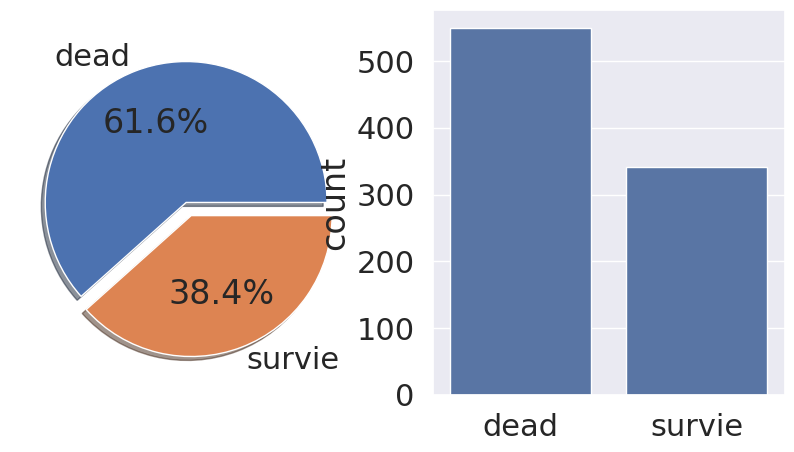

In [26]:
# plt.subplots(행 수, 열 수, 번호)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
labels = ['dead','survie']

df_survived = train_df['Survived'].value_counts()
df_survived.plot.pie(ax = ax[0], explode = [0, 0.1], shadow = True, autopct = '%1.1f%%', labels = labels)
ax[0].set(ylabel = '')

sns.countplot(data = train_df, x = 'Survived', ax = ax[1])
ax[1].set(xlabel='', xticklabels = labels)

plt.show()

In [28]:
train_df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [29]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

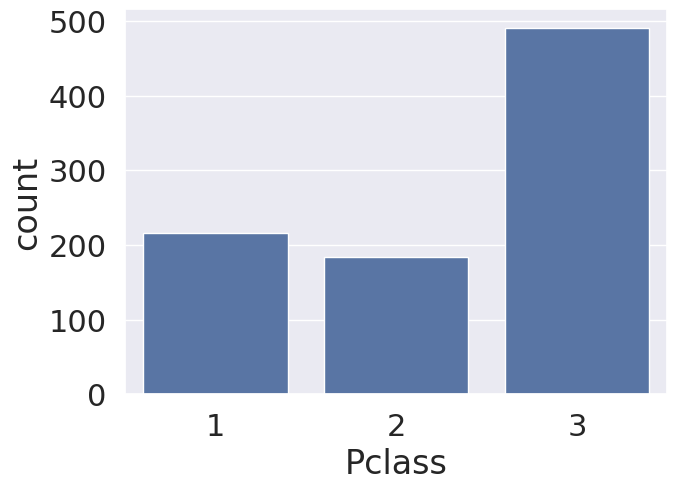

In [30]:
fig, ax = plt.subplots(figsize = (7,5))

sns.countplot(data = train_df, x = 'Pclass', ax = ax)

plt.show()

In [34]:
# Pclass에 따른 Survived 평균
train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


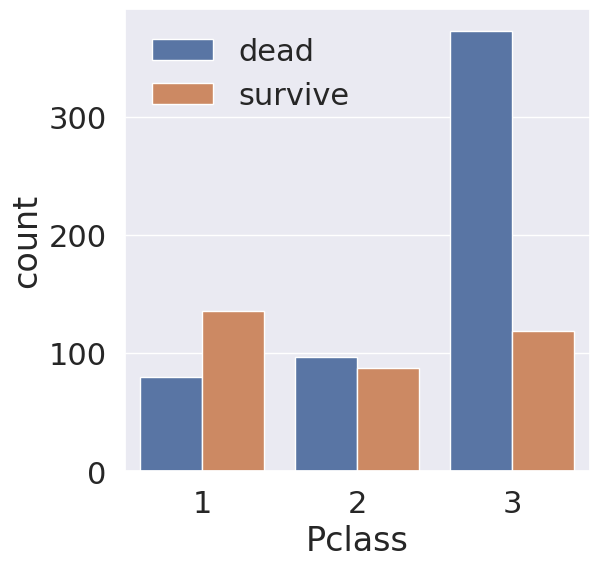

In [35]:
fig , ax = plt.subplots(figsize = (6,6))

sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived' , ax = ax)

labels = ['dead', 'survive']
ax.legend(labels = labels)

plt.show()